In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from store_sales import *

At first let's load the data and check whether it's done correctly

In [141]:
data = pd.read_csv('../data/train.csv')
holidays_events_data = pd.read_csv('../data/holidays_events.csv')
oil_data = pd.read_csv('../data/oil.csv')
stores_data = pd.read_csv('../data/stores.csv')
transactions_data = pd.read_csv('../data/transactions.csv')

In [142]:
data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [143]:
data.tail()

,id,date,store_nbr,family,sales,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


In [144]:
holidays_events_data.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [145]:
holidays_events_data.tail()

,date,type,locale,locale_name,description,transferred
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False
349,2017-12-26,Additional,National,Ecuador,Navidad+1,False


In [146]:
oil_data.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [147]:
oil_data.tail()

,date,dcoilwtico
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96
1217,2017-08-31,47.26


In [148]:
stores_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [149]:
stores_data.tail()

,store_nbr,city,state,type,cluster
49,50,Ambato,Tungurahua,A,14
50,51,Guayaquil,Guayas,A,17
51,52,Manta,Manabi,A,11
52,53,Manta,Manabi,D,13
53,54,El Carmen,Manabi,C,3


In [150]:
transactions_data.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [151]:
transactions_data.tail()

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


Now let's check whether there are some missing values of duplicated rows

In [152]:
data.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [153]:
data.duplicated().sum()

0

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [155]:
holidays_events_data.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [156]:
holidays_events_data.duplicated().sum()

0

In [157]:
oil_data.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [158]:
oil_data.duplicated().sum()

0

In [159]:
len(data)

3000888

Now let's do data splitting before data preparation and EDA

In [160]:
X = data.drop(['sales'], axis=1)
y = data['sales']
X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, shuffle=False, test_size=0.5, random_state=42)

In [161]:
len(X_train), len(X_valid), len(X_test)

(2400710, 300089, 300089)

In [162]:
X_train.tail()

,id,date,store_nbr,family,onpromotion
2400705,2400705,2016-09-12,19,LINGERIE,0
2400706,2400706,2016-09-12,19,"LIQUOR,WINE,BEER",0
2400707,2400707,2016-09-12,19,MAGAZINES,0
2400708,2400708,2016-09-12,19,MEATS,0
2400709,2400709,2016-09-12,19,PERSONAL CARE,8


In [163]:
X_valid.head()

,id,date,store_nbr,family,onpromotion
2400710,2400710,2016-09-12,19,PET SUPPLIES,0
2400711,2400711,2016-09-12,19,PLAYERS AND ELECTRONICS,0
2400712,2400712,2016-09-12,19,POULTRY,0
2400713,2400713,2016-09-12,19,PREPARED FOODS,1
2400714,2400714,2016-09-12,19,PRODUCE,1


In [164]:
X_valid.tail()

,id,date,store_nbr,family,onpromotion
2700794,2700794,2017-02-28,39,DAIRY,15
2700795,2700795,2017-02-28,39,DELI,7
2700796,2700796,2017-02-28,39,EGGS,1
2700797,2700797,2017-02-28,39,FROZEN FOODS,4
2700798,2700798,2017-02-28,39,GROCERY I,72


In [165]:
X_test.head()

,id,date,store_nbr,family,onpromotion
2700799,2700799,2017-02-28,39,GROCERY II,1
2700800,2700800,2017-02-28,39,HARDWARE,0
2700801,2700801,2017-02-28,39,HOME AND KITCHEN I,2
2700802,2700802,2017-02-28,39,HOME AND KITCHEN II,2
2700803,2700803,2017-02-28,39,HOME APPLIANCES,0


In [166]:
X_test.tail()

,id,date,store_nbr,family,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,1
3000885,3000885,2017-08-15,9,PRODUCE,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,8
3000887,3000887,2017-08-15,9,SEAFOOD,0


In [167]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data.head()

,id,date,store_nbr,family,onpromotion,sales
0,0,2013-01-01,1,AUTOMOTIVE,0,0.0
1,1,2013-01-01,1,BABY CARE,0,0.0
2,2,2013-01-01,1,BEAUTY,0,0.0
3,3,2013-01-01,1,BEVERAGES,0,0.0
4,4,2013-01-01,1,BOOKS,0,0.0


Now let's perform some necessary data preparation of the train part for EDA

In [168]:
train_data = prepare_data(train_data, holidays_events_data, oil_data, stores_data)

/Users/stanislavyatsevich/Desktop/Store_Sales/src/store_sales/functions.py:26: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [169]:
len(train_data)

2400710

In [170]:
train_data.head()

,date,store_number,item_family,items_on_promotion,item_sales,city,state,store_type,store_cluster,oil_price,day_type,holiday_status,holiday_location,holiday_description,is_holiday_transferred
id,,,,,,,,,,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0,0.0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-01,1,BABY CARE,0,0.0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False
2,2013-01-01,1,BEAUTY,0,0.0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False
3,2013-01-01,1,BEVERAGES,0,0.0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False
4,2013-01-01,1,BOOKS,0,0.0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False


In [171]:
train_data.tail()

,date,store_number,item_family,items_on_promotion,item_sales,city,state,store_type,store_cluster,oil_price,day_type,holiday_status,holiday_location,holiday_description,is_holiday_transferred
id,,,,,,,,,,,,,,,
2400705,2016-09-12,19,LINGERIE,0,26.000,Guaranda,Bolivar,C,15,46.28,Not holiday,Not holiday,Not holiday,Not holiday,False
2400706,2016-09-12,19,"LIQUOR,WINE,BEER",0,9.000,Guaranda,Bolivar,C,15,46.28,Not holiday,Not holiday,Not holiday,Not holiday,False
2400707,2016-09-12,19,MAGAZINES,0,1.000,Guaranda,Bolivar,C,15,46.28,Not holiday,Not holiday,Not holiday,Not holiday,False
2400708,2016-09-12,19,MEATS,0,170.509,Guaranda,Bolivar,C,15,46.28,Not holiday,Not holiday,Not holiday,Not holiday,False
2400709,2016-09-12,19,PERSONAL CARE,8,181.000,Guaranda,Bolivar,C,15,46.28,Not holiday,Not holiday,Not holiday,Not holiday,False


In [172]:
train_data.index.value_counts()

id
0          1
1600485    1
1600469    1
1600470    1
1600471    1
          ..
800237     1
800238     1
800239     1
800240     1
2400709    1
Name: count, Length: 2400710, dtype: int64

We see that the data is prepared correctly and now let's search for some interesting patterns in it (i.e EDA)

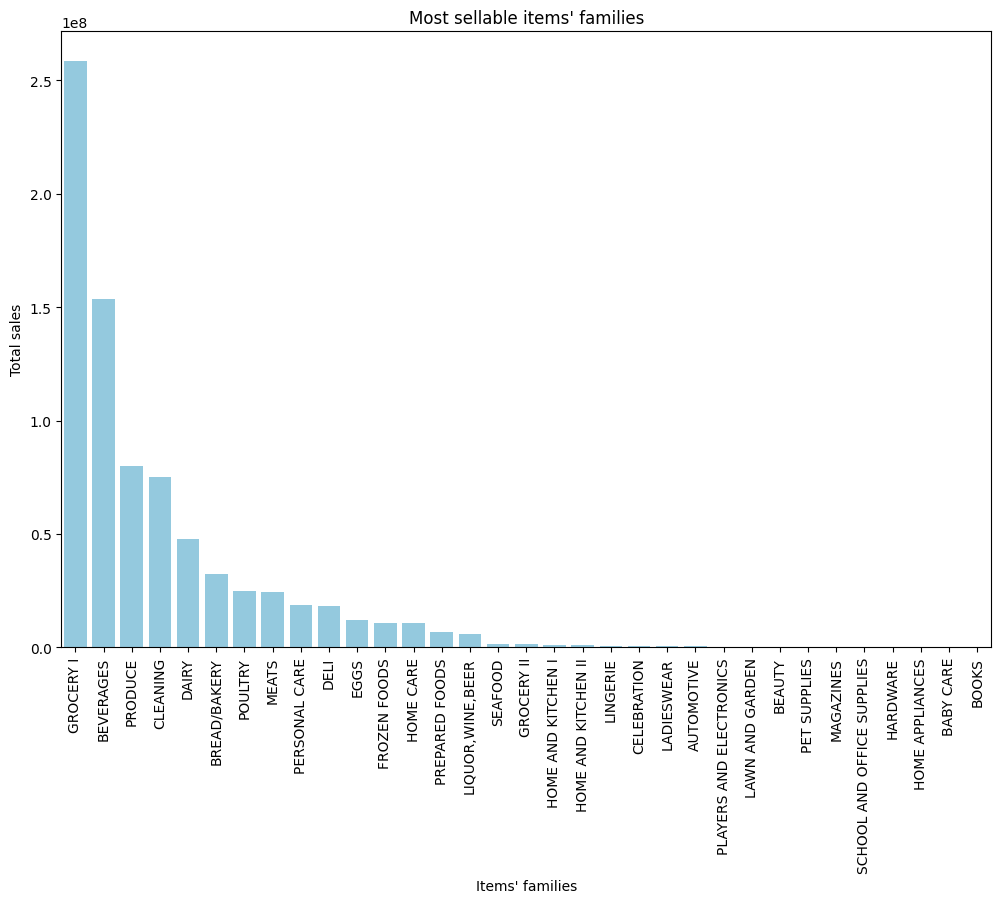

In [173]:
item_families_sales_summary = train_data.groupby('item_family')['item_sales'].sum().reset_index().sort_values(by='item_sales', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=item_families_sales_summary, x='item_family', y='item_sales', color='skyblue')
plt.xlabel("Items' families")
plt.ylabel("Total sales")
plt.title("Most sellable items' families")
plt.xticks(rotation=90)  
plt.show()

Grocery, Beverages, Produce, Cleaning and Dairy – top 5 most sellable items' families

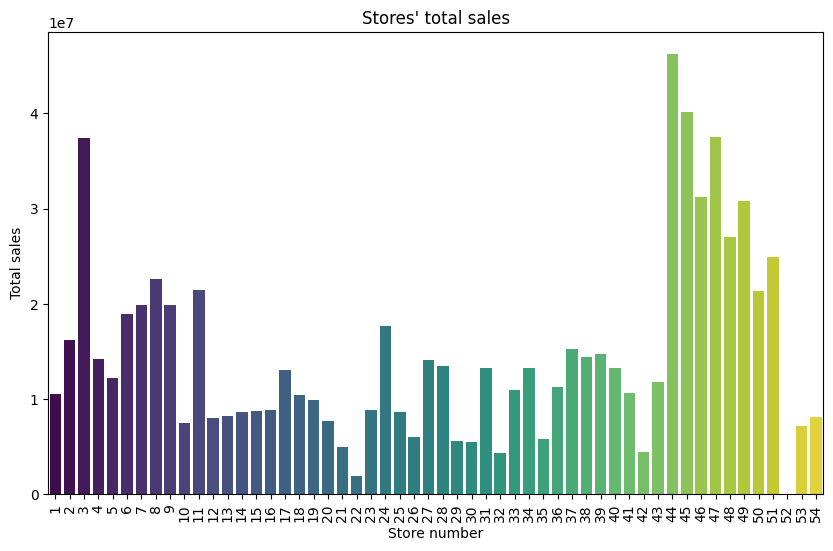

In [174]:
store_sales_summary = train_data.groupby('store_number')['item_sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=store_sales_summary, x='store_number', y='item_sales', hue='store_number', dodge=False, palette='viridis', legend=False)
plt.xlabel('Store number')
plt.ylabel('Total sales')
plt.title("Stores' total sales")
plt.xticks(rotation=90)
plt.show()

There are 11 stores (3, 8, 11, 44, 45, 46, 47, 48, 49, 50, 51) with at least 20 million total sales. Let's check their locations

In [175]:
train_data[train_data['store_number'].isin([3, 8, 11, 44, 45, 46, 47, 48, 49, 50, 51])]['city'].value_counts()

city
Quito        355608
Cayambe       44484
Ambato        44451
Guayaquil     44451
Name: count, dtype: int64

Let's see average sales among all shops and dates

In [176]:
np.round(train_data['item_sales'].mean(), 2)

328.24

Now let's see average sales depending on store type and store cluster

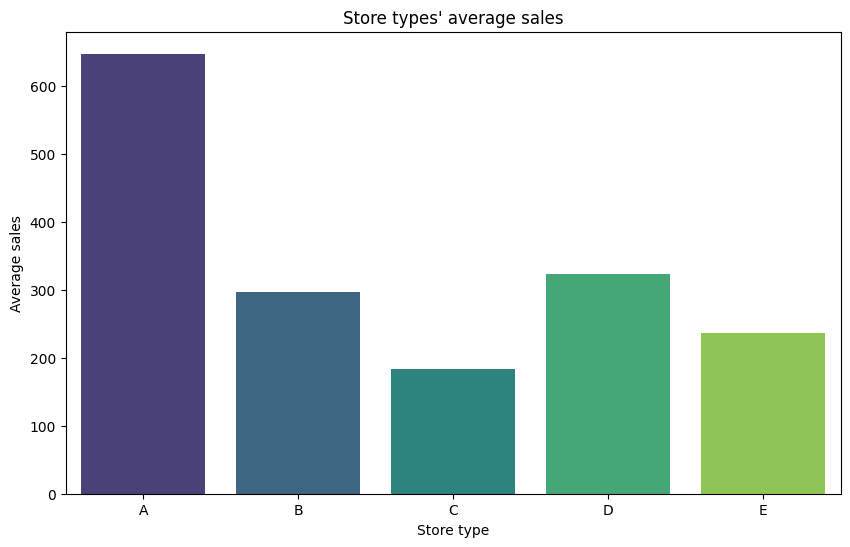

In [177]:
store_type_sales_summary = train_data.groupby('store_type')['item_sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=store_type_sales_summary, x='store_type', y='item_sales', hue='store_type', dodge=False, palette='viridis', legend=False)
plt.xlabel('Store type')
plt.ylabel('Average sales')
plt.title("Store types' average sales")
plt.xticks()
plt.show()

Stores of type A completely dominate over other stores' types. Its average sales are at least twice higher than any other type's

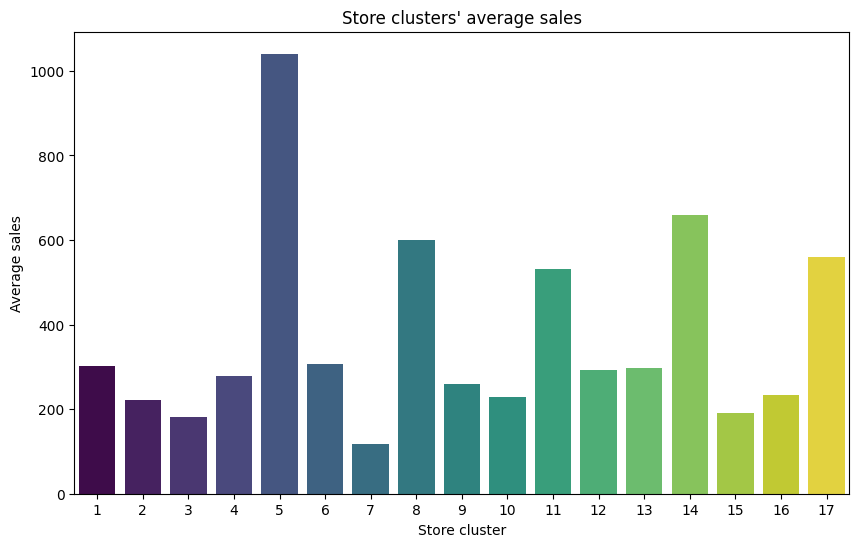

In [178]:
store_cluster_sales_summary = train_data.groupby('store_cluster')['item_sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=store_cluster_sales_summary, x='store_cluster', y='item_sales', hue='store_cluster', dodge=False, palette='viridis', legend=False)
plt.xlabel('Store cluster')
plt.ylabel('Average sales')
plt.title("Store clusters' average sales")
plt.xticks()
plt.show()

There's a slightly different situation with store clusters. There are 5 among them (5, 8, 11, 14, 17) with each's average sales 530+ while others' average sales are <307

Now let's see average sales for every city and state

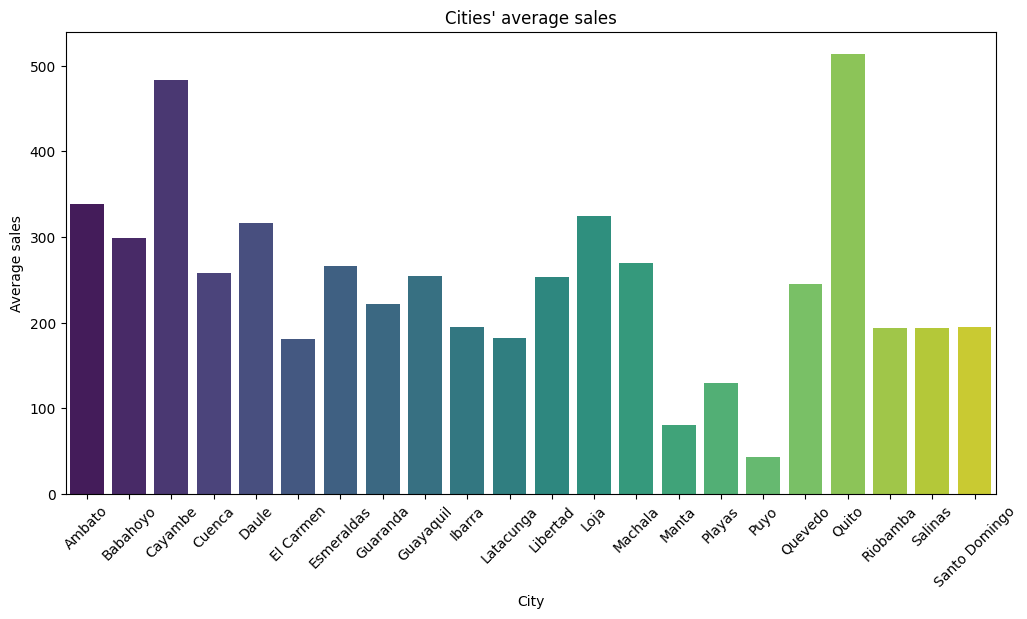

In [179]:
cities_sales_summary = train_data.groupby('city')['item_sales'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=cities_sales_summary, x='city', y='item_sales', hue='city', dodge=False, palette='viridis', legend=False)
plt.xlabel('City')
plt.ylabel('Average sales')
plt.title("Cities' average sales")
plt.xticks(rotation=45)
plt.show()

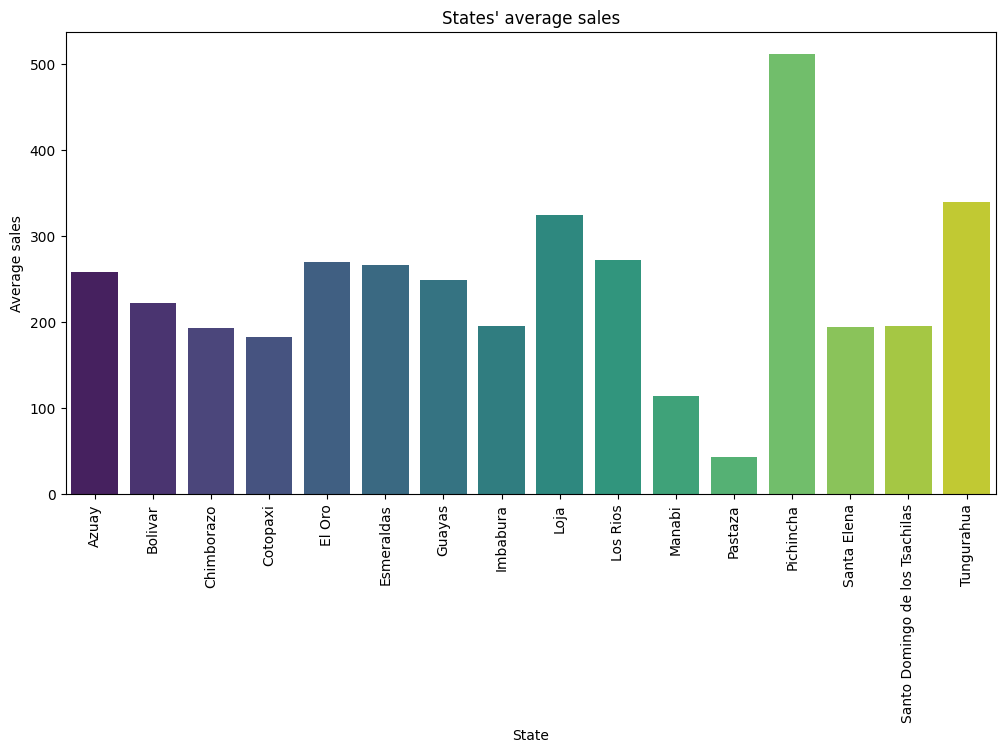

In [180]:
states_sales_summary = train_data.groupby('state')['item_sales'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=states_sales_summary, x='state', y='item_sales', hue='state', dodge=False, palette='viridis', legend=False)
plt.xlabel('State')
plt.ylabel('Average sales')
plt.title("States' average sales")
plt.xticks(rotation=90)
plt.show()

There are 5 cities (Quito, Cayambe, Manta, Puyo, Playas) whose average sales stand out (First 2 are much higher than the mean number, last 3 are much lower).

As for states, the main one here is Pichincha that dominates over others.

Now let's see total sales for every month

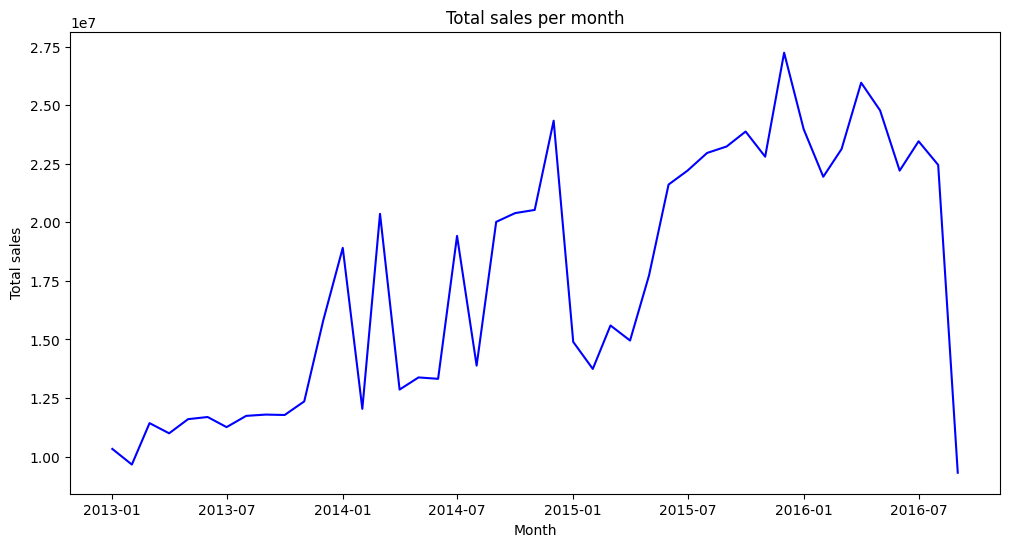

In [181]:
train_data['year_month'] = train_data['date'].dt.to_period('M')

monthly_sales_summary = train_data.groupby('year_month')['item_sales'].sum().reset_index()
monthly_sales_summary['year_month'] = monthly_sales_summary['year_month'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales_summary, x='year_month', y='item_sales', color='blue')
plt.xlabel('Month')
plt.ylabel('Total sales')
plt.title('Total sales per month')
plt.show()

As you can see the sales are jumping very hard, difficult to see a distinct trend or seasonality except for the December's prices rising

Now let's see the oil prices' dependency on time

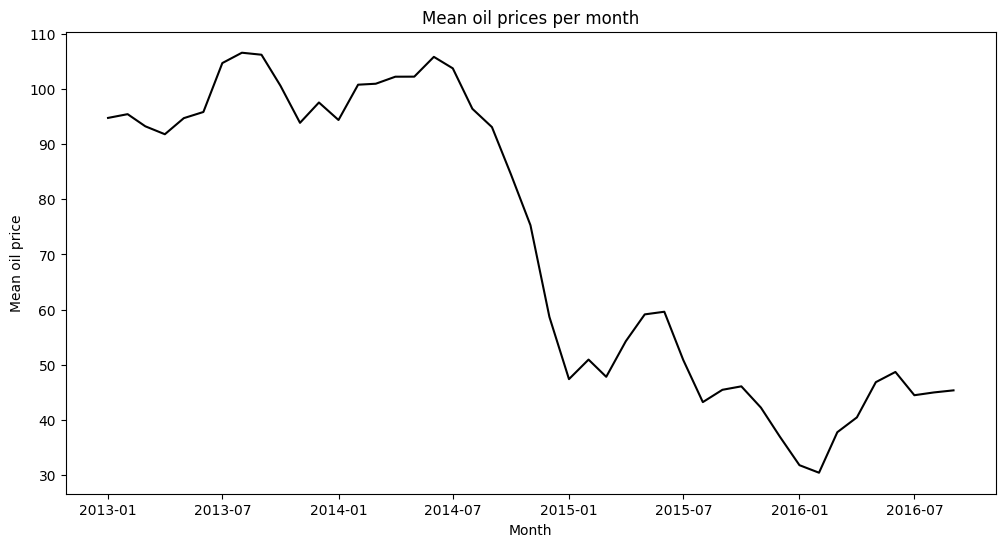

In [182]:
train_data['year_month'] = pd.to_datetime(train_data['date']).dt.to_period('M')

monthly_oil_price_summary = train_data.groupby('year_month')['oil_price'].mean().reset_index()
monthly_oil_price_summary['year_month'] = monthly_oil_price_summary['year_month'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_oil_price_summary, x='year_month', y='oil_price', color='black')
plt.xlabel('Month')
plt.ylabel('Mean oil price')
plt.title('Mean oil prices per month')
plt.show()

There are obviously 2 double price losses within just 6 months (July 2014 - January 2015 and June 2015 - January 2016)  

Now let's see mean sales for all day types

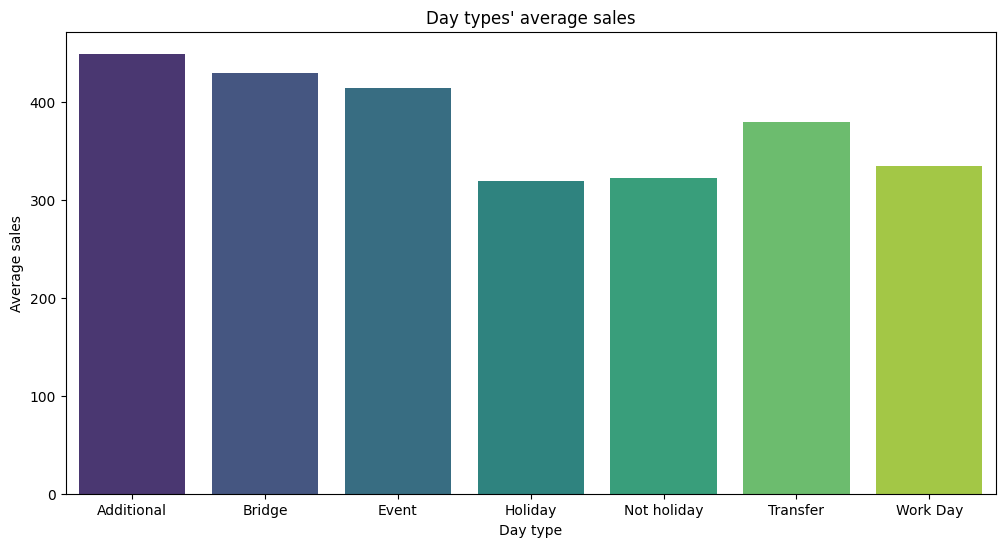

In [183]:
day_types_sales_summary = train_data.groupby('day_type')['item_sales'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=day_types_sales_summary, x='day_type', y='item_sales', hue='day_type', dodge=False, palette='viridis', legend=False)
plt.xlabel('Day type')
plt.ylabel('Average sales')
plt.title("Day types' average sales")
plt.show()

It's visible that average sales are slightly higher on "special" days (Additional, Bridge, Transfer holidays or days with events)

Now let's check sales depending on holidays' features

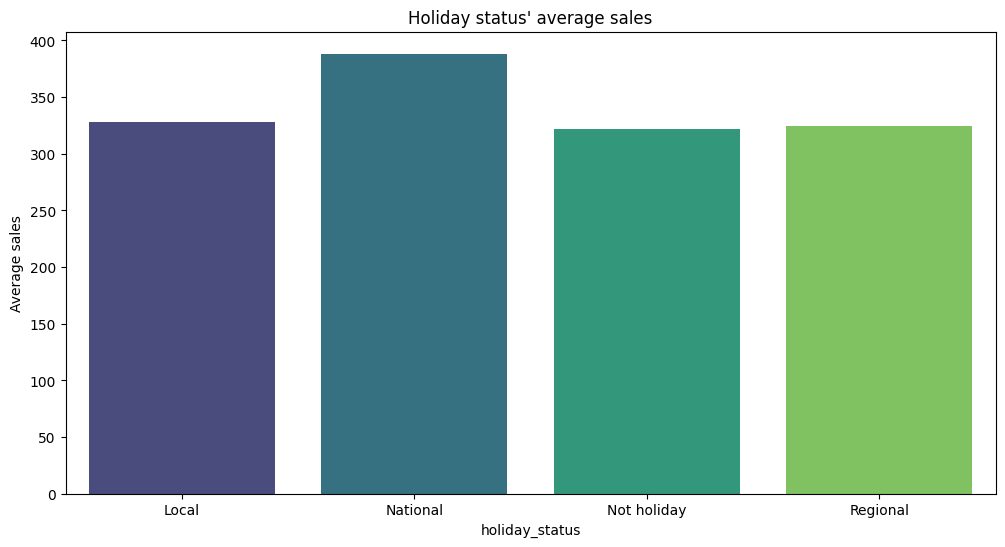

In [184]:
holiday_status_sales_summary = train_data.groupby('holiday_status')['item_sales'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=holiday_status_sales_summary, x='holiday_status', y='item_sales', hue='holiday_status', dodge=False, palette='viridis', legend=False)
plt.xlabel('holiday_status')
plt.ylabel('Average sales')
plt.title("Holiday status' average sales")
plt.show()

As you can see average sales are 20% higher on those holidays which are National ones, while for other types of holidays(Local, Regional) they are almost as on usual days

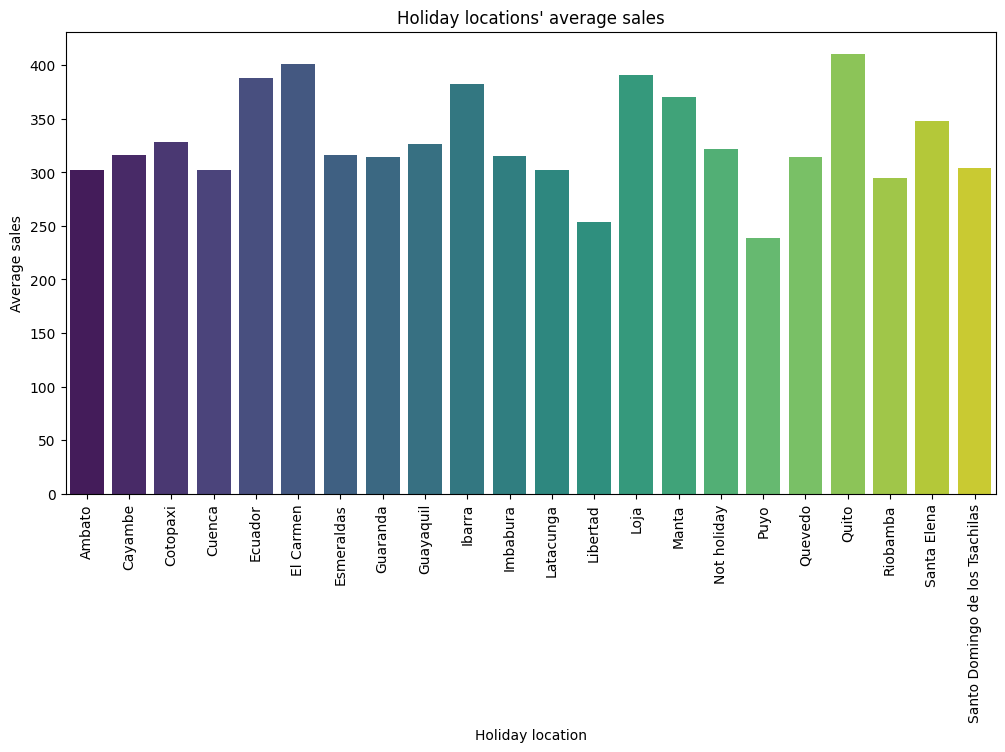

In [185]:
holiday_location_sales_summary = train_data.groupby('holiday_location')['item_sales'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=holiday_location_sales_summary, x='holiday_location', y='item_sales', hue='holiday_location', dodge=False, palette='viridis', legend=False)
plt.xlabel('Holiday location')
plt.ylabel('Average sales')
plt.title("Holiday locations' average sales")
plt.xticks(rotation=90)
plt.show()

It's visible that average sales are distributed more or less uniformly among different holidays' locations

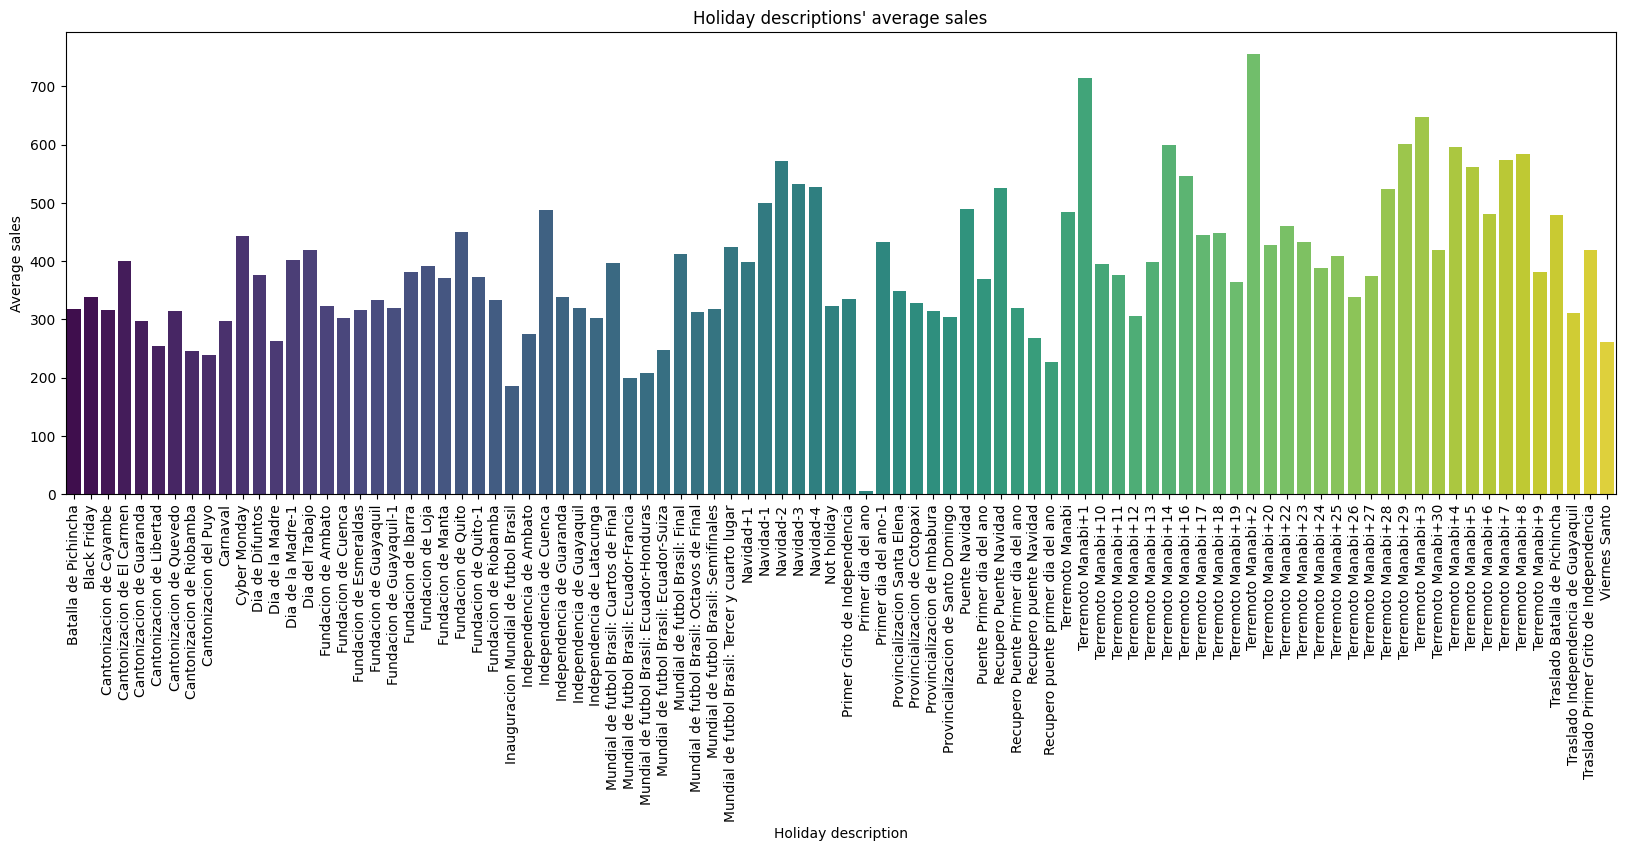

In [186]:
holiday_description_sales_summary = train_data.groupby('holiday_description')['item_sales'].mean().reset_index()

plt.figure(figsize=(20, 6))
sns.barplot(data=holiday_description_sales_summary, x='holiday_description', y='item_sales', hue='holiday_description', dodge=False, palette='viridis', legend=False)
plt.xlabel('Holiday description')
plt.ylabel('Average sales')
plt.title("Holiday descriptions' average sales")
plt.xticks(rotation=90)
plt.show()

There was an earthquake in Equador on April 16, 2016 that affected sales. As you can see, sales rose up significantly within first days after the catastrophe (Teremoto Manabi +n columns where n means number of days passed after the earthquake)